Modern AI Post Module

Zachary Long
zwl216

This notebook provides necessary code and instructions for the independent exercises, including two big problems. **You only have to complete all of the blanks that are marked as ``TODO" in this notebook.**  Please submit the completed .ipynb file as your homework submission (with your name and ID here).

Zachary Long
zwl216

# Problem 1: Predicting Breast Cancer using Deep Neural Networks with Python

#*Import Libraries and Load the Data*

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn.datasets as data
from keras import layers

cancer = data.load_breast_cancer()
BreastCancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
BreastCancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


``BreastCancer`` has 569 rows and 31 columns, where each row represents a sample case, and each column represents a feature. All columns except 'target' represent different medical characteristics. The 'target' column indicates whether the tumor is benign or not. In our problem, we will use the target column as the label ``y`` (0 for benign and 1 for malignant), and all other features as predictors.

#*Partition Data*

Now we are ready to do the train/test splitting. Randomly choose 70\% of the samples to be the training set and let the rest be the test set.

In [2]:
indices = np.random.permutation(BreastCancer.shape[0])
train_n = int(np.floor(BreastCancer.shape[0]*0.7))
print(train_n)
print(BreastCancer.shape[0])

train_idx, test_idx = indices[:train_n], indices[train_n:]
train_x, test_x = BreastCancer.iloc[train_idx,:-1], BreastCancer.iloc[test_idx,:-1]
train_y, test_y = BreastCancer.iloc[train_idx,-1], BreastCancer.iloc[test_idx,-1]

398
569


#*Specify and Fit Neural Network*

Build a neural network with two fully connected layers (name it `model`). The first layer should have 32 hidden units and a `relu` activation. The second layer should have only one unit, and the activation function should be the `sigmoid` function, since we are dealing with a binary classification problem.


In [3]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

##TO DO
'''
model = keras.Sequential([
      layers.Dense(units=100,activation="relu"),
      layers.Dense(units=10,activation="relu"),
      layers.Dense(units=1,activation="sigmoid")
])
'''
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(train_x.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Next, compile the model using an "rmsprop" optimizer and an appropriate loss function. Also, set metrics to record "accuracy" during training.

In [4]:
##TO DO

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fit the model on the training set with 20 epochs and batch size 32. Remember to store the outputs into a variable
`history` for visualizing the training process.

In [5]:
##TO DO
'''
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)
'''

history = model.fit(
    train_x,
    train_y,
    epochs=20,
    batch_size=32,
    validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 4s 136ms/step - loss: 82.2997 - accuracy: 0.6006 - val_loss: 24.0059 - val_accuracy: 0.6375
Epoch 2/20
10/10 [==============================] - 0s 12ms/step - loss: 6.9108 - accuracy: 0.6918 - val_loss: 1.0491 - val_accuracy: 0.7750
Epoch 3/20
10/10 [==============================] - 0s 14ms/step - loss: 1.2901 - accuracy: 0.7736 - val_loss: 0.7685 - val_accuracy: 0.8375
Epoch 4/20
10/10 [==============================] - 0s 15ms/step - loss: 1.3572 - accuracy: 0.7579 - val_loss: 0.7676 - val_accuracy: 0.8125
Epoch 5/20
10/10 [==============================] - 0s 25ms/step - loss: 1.4933 - accuracy: 0.7673 - val_loss: 1.9739 - val_accuracy: 0.7875
Epoch 6/20
10/10 [==============================] - 0s 15ms/step - loss: 1.8813 - accuracy: 0.7516 - val_loss: 1.1399 - val_accuracy: 0.8625
Epoch 7/20
10/10 [==============================] - 0s 22ms/step - loss: 1.1429 - accuracy: 0.8082 - val_loss: 0.5574 - val_accuracy: 0.9000
Epoch 8/20

Plot `history` to see the training process. Report the loss and the accuracy on the training set in the final epoch, which can be displayed using commands of the following form `print(history.history['loss'][-1]`.

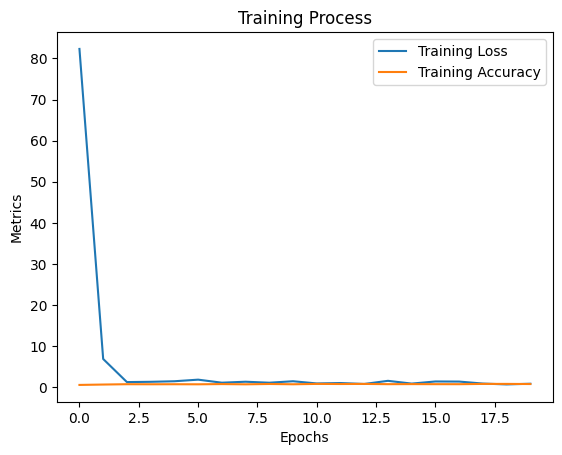

Loss on the training set in the final epoch: 0.891424298286438
Accuracy on the training set in the final epoch: 0.8176100850105286


In [6]:
#TO DO
'''
plt.plot(history.history['val_accuracy'],c="b")
plt.plot(history.history['accuracy'],c="r")
plt.legend(['Validation Acc','Training Acc'])
plt.show()
'''

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training Process')
plt.legend()
plt.show()

# Report the loss and accuracy on the training set in the final epoch
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]

print("Loss on the training set in the final epoch:", final_loss)
print("Accuracy on the training set in the final epoch:", final_accuracy)

Finally, report the loss and the accuracy of your network on the test set.

In [7]:
##TO DO
'''
test_model = keras.models.load_model("drive/My Drive/Teaching/Courses/NYU - Modern AI/Session 4-5/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")
'''

test_loss, test_accuracy = model.evaluate(test_x, test_y)

# Report the test set performance
print("Test set performance of the Network:")
print("  Loss:", test_loss)
print("  Accuracy:", test_accuracy)

6/6 [==============================] - 0s 8ms/step - loss: 1.8071 - accuracy: 0.8304
Test set performance of the Network:
  Loss: 1.8070671558380127
  Accuracy: 0.8304093480110168


#*Try Different Network Structures*

Now, based on the `model` you just built, build three different networks as follows.

*  `network_deeper`: Add another dense layer between the two layers of your first `network`. The newly-added layer should contain 16 hidden units and a `relu` activation.
*   `network_regularized`: Add an $\ell_2$ regularizer to the first layer of `network`, with regularization parameter `0.01`. Note that a kernel_regularizer="l2" will use a default value of 0.01 for the parameter.
*   `network_dropout`: Add a dropout layer between the first layer and the last layer of `network`, with the drop rate `0.5`.


Train these networks using the same compile step and the same fit step you used for your first `network`. Report the accuracies of the three new models on the test set.

In [8]:
##TO DO

from keras import regularizers

# Network with an additional dense layer
network_deeper = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(train_x.shape[1],)),
    layers.Dense(16, activation='relu'),  # Additional dense layer with 16 hidden units and ReLU activation
    layers.Dense(1, activation='sigmoid')
])

# Compile the deeper network
network_deeper.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the deeper network
history_deeper = network_deeper.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

# Network with L2 regularization
network_regularized = keras.Sequential([
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(train_x.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the regularized network
network_regularized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the regularized network
history_regularized = network_regularized.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

# Network with dropout
network_dropout = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(train_x.shape[1],)),
    layers.Dropout(0.5),  # Dropout layer with dropout rate 0.5
    layers.Dense(1, activation='sigmoid')
])

# Compile the dropout network
network_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the dropout network
history_dropout = network_dropout.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 6s 95ms/step - loss: 16.9354 - accuracy: 0.3962 - val_loss: 14.6378 - val_accuracy: 0.4750
Epoch 2/20
10/10 [==============================] - 0s 16ms/step - loss: 12.2052 - accuracy: 0.3365 - val_loss: 9.5007 - val_accuracy: 0.3625
Epoch 3/20
10/10 [==============================] - 0s 13ms/step - loss: 7.2473 - accuracy: 0.2673 - val_loss: 5.0753 - val_accuracy: 0.2625
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 3.7558 - accuracy: 0.3962 - val_loss: 3.3523 - val_accuracy: 0.5375
Epoch 5/20
10/10 [==============================] - 0s 19ms/step - loss: 2.0877 - accuracy: 0.4843 - val_loss: 0.9809 - val_accuracy: 0.7125
Epoch 6/20
10/10 [==============================] - 0s 28ms/step - loss: 1.5438 - accuracy: 0.6509 - val_loss: 1.2893 - val_accuracy: 0.5875
Epoch 7/20
10/10 [==============================] - 0s 22ms/step - loss: 1.2049 - accuracy: 0.7390 - val_loss: 1.1011 - val_accuracy: 0.6500
Epoch 8/20

Test set performance of each new network...

In [9]:
##TO DO

##TO DO
# Evaluate the performance of the three new models on the test set
test_loss_deeper, test_accuracy_deeper = network_deeper.evaluate(test_x, test_y)
test_loss_regularized, test_accuracy_regularized = network_regularized.evaluate(test_x, test_y)
test_loss_dropout, test_accuracy_dropout = network_dropout.evaluate(test_x, test_y)

# Report the test set performance
print("Test set performance of the Deeper Network:")
print("  Loss:", test_loss_deeper)
print("  Accuracy:", test_accuracy_deeper)

print("\nTest set performance of the Regularized Network:")
print("  Loss:", test_loss_regularized)
print("  Accuracy:", test_accuracy_regularized)

print("\nTest set performance of the Dropout Network:")
print("  Loss:", test_loss_dropout)
print("  Accuracy:", test_accuracy_dropout)

6/6 [==============================] - 0s 3ms/step - loss: 0.8494 - accuracy: 0.9123
Test set performance of the Deeper Network:
  Loss: 0.25109389424324036
  Accuracy: 0.9064327478408813

Test set performance of the Regularized Network:
  Loss: 1.1117372512817383
  Accuracy: 0.9064327478408813

Test set performance of the Dropout Network:
  Loss: 0.8494138717651367
  Accuracy: 0.9122806787490845


Based on the test accuracies, which one of the three networks perform the best?

Ans: # TODO

Based on accuracies alone, the Deeper and Dropout networks have the same accuracy rate at 0.92982. Looking at the Loss factor as well when comparing these two outputs, the Deeper network has a lower loss. The Deeper Network would have a better fit to the data as well as less errors.

# Problem 2: Fashion_MNIST Classification using Convolutional Neural Networks

In this problem, we will train a *convolutional neural network* (CNN) for clothing classification using the Fashion_MNIST dataset. Fashion_MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes of clothing, such as shoes, t-shirts, dresses, and so on. See [here](https://github.com/zalandoresearch/fashion-mnist) for more details.

Load the Fashion_MNIST dataset, which is included in `keras`, and then construct the training and test sets.

In [10]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


Similar to the MNIST dataset, the images are encoded as 3D arrays, and the labels are a 1D array of categories, ranging from 0 to 9. The training images are stored in an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with values between 0 and 255. The first 36 images are visualized as follows.

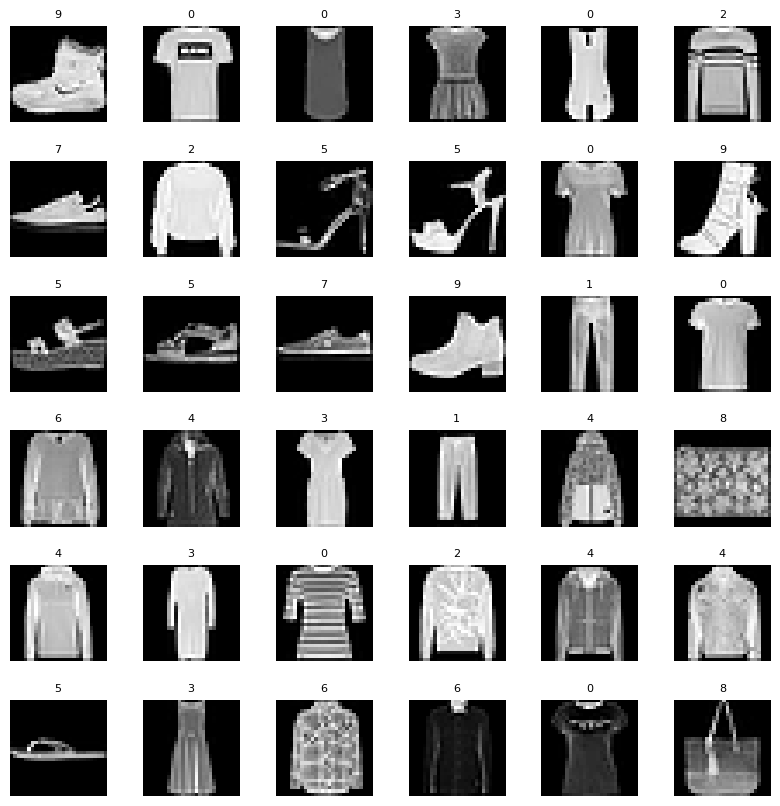

In [11]:
# Define the dimensions of the plot grid
W_grid = 6
L_grid = 6

# Create a subplot of 6 x 6 images
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

# Flatten the 6 x 6 grid into 36 items
axes = axes.ravel()

# Loop through the first 36 images
for i in np.arange(0, W_grid * L_grid):
    # Select random images to display
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(y_train[i], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

First, preprocess the data through the following steps:
1.  Reshape the images into the shape that a CNN expects. The shape of `X_train` and `X_test` should be (60000, 28, 28, 1) and (10000, 28, 28, 1), respectively.
2. Scale `X_train` and `X_test` so that their values are in the [0, 1] interval.
3. One-hot encode the labels `y_train` and `y_test` using the to_categorical function from keras.utils.



In [12]:
from keras.utils import to_categorical

##TO DO
'''
# Pre-process the data, to flatten the images into vectors and scale the values.
train_images = train_images.reshape((len(train_images), 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((len(test_images), 28*28))
test_images = test_images.astype("float32") / 255

# And reshape these to make sure the second dimension is formally defined as 1 (else you'll get a shape error in the model.fit() call)
train_labels = train_labels.reshape(len(train_labels),1)
test_labels = test_labels.reshape(len(test_labels),1)
'''

# Reshape the images into the shape that a CNN expects. The shape of X_train and X_test should be (60000, 28, 28, 1) and (10000, 28, 28, 1), respectively.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scale the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels y_train and y_test using the to_categorical function from keras.utils.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the preprocessed data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of x_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


Now build a CNN model that sequentially includes:

*   A 2D convolution layer with 16 filters of size 3$\times$3, zero padding, and `"relu"` activation;
*   A maxpooling layer with size 2$\times$2;
*   A flatten layer;
*   A dense layer with 64 hidden units and a `"relu"` activation;
*   Another dense layer with 10 units and `"softmax"` activation.


In [13]:
##TO DO
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import math
# from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = keras.Sequential()

# Add the convolutional layer
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

# Add the max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flattening layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add the dense layer with softmax activation for classification
model.add(Dense(10, activation='softmax'))


Now compile the CNN you just built with a proper loss function, the `"rmsprop"` optimizer , and the `"acc"` metric.  

In [14]:
##TO DO

# Compile the model
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                200768    
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 201578 (787.41 KB)
Trainable params: 201578 (787.41 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Fit the model on the training set with 10 epochs. Remember to record the output into a `history` variable.

In [15]:
##TO DO

# Fit the model on the training data
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4336 - accuracy: 0.8450 - val_loss: 0.3236 - val_accuracy: 0.8857
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2949 - accuracy: 0.8958 - val_loss: 0.2906 - val_accuracy: 0.8961
Epoch 3/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2532 - accuracy: 0.9091 - val_loss: 0.2767 - val_accuracy: 0.9007
Epoch 4/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2262 - accuracy: 0.9176 - val_loss: 0.2556 - val_accuracy: 0.9092
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2026 - accuracy: 0.9271 - val_loss: 0.2542 - val_accuracy: 0.9106
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1872 - accuracy: 0.9320 - val_loss: 0.2496 - val_accuracy: 0.9132
Epoch 7/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1725 - accuracy: 0.9381 - val_loss: 0.2623 -

Plot the history and report the training accuracy in the final epoch.

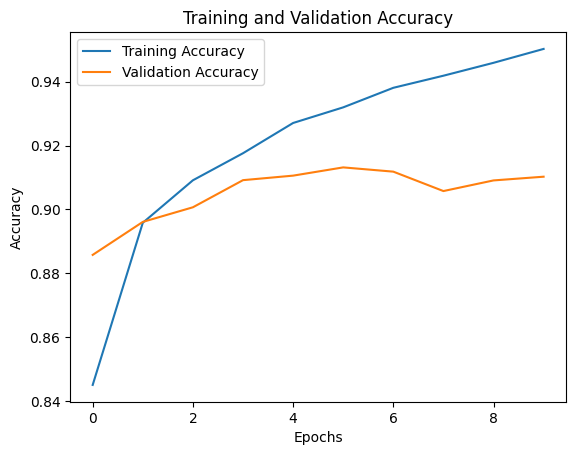

Training Accuracy in the Final Epoch: 0.9502916932106018


In [16]:
##TO DO

import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Report the training accuracy in the final epoch
final_training_accuracy = history.history['accuracy'][-1]
print("Training Accuracy in the Final Epoch:", final_training_accuracy)

Evaluate the model on the test set. Report the test accuracy.

In [17]:
##TO DO

# Evaluate the model on the test set.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Report the test accuracy.
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.3098 - accuracy: 0.9033
Test Accuracy: 0.9032999873161316
